In [2]:

import yfinance as yf

df = yf.download(tickers='BTC-USD', period='1d', interval='1m')
df_new = yf.download(tickers='BTC-USD', period='1d', interval='1m')
#df = yf.download(tickers = 'CL=F', start = '2021-03-11',end = '2022-07-10',interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [75]:
df_new

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-07-20 00:00:00+00:00,66707.671875,66707.671875,66707.671875,66707.671875,66707.671875,0
2024-07-20 00:01:00+00:00,66753.750000,66753.750000,66753.750000,66753.750000,66753.750000,741376
2024-07-20 00:02:00+00:00,66793.468750,66793.468750,66793.468750,66793.468750,66793.468750,0
2024-07-20 00:03:00+00:00,66741.289062,66741.289062,66741.289062,66741.289062,66741.289062,3018752
2024-07-20 00:04:00+00:00,66732.789062,66732.789062,66732.789062,66732.789062,66732.789062,7200768
...,...,...,...,...,...,...
2024-07-20 08:00:00+00:00,66609.632812,66609.632812,66609.632812,66609.632812,66609.632812,3371008
2024-07-20 08:01:00+00:00,66611.085938,66611.085938,66611.085938,66611.085938,66611.085938,0
2024-07-20 08:02:00+00:00,66604.046875,66604.046875,66604.046875,66604.046875,66604.046875,0


In [13]:
import pandas as pd
import pandas_ta as ta

# Assuming df is your DataFrame containing OHLCV data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Close', 'Volume'

# Filter out rows with zero volume
df = df[df['Volume'] != 0]

# Convert the DataFrame index to datetime (assuming your index represents timestamps)
df.index = pd.to_datetime(df.index)

# Extract date and time features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute

# Assuming your DataFrame index is in UTC, you might want to convert it to the timezone relevant for the European market
# Example:
# df = df.tz_localize('UTC').tz_convert('Europe/Paris')
# Reset the index without adding the previous index as a new column
df.reset_index(drop=True, inplace=True)

# Now the DataFrame will have a default integer index without the previous index as a column

# Calculate RSI with a length of 14
df['RSI'] = ta.rsi(df['Close'], length=14).fillna(method='bfill')

# Calculate EMA with a length of 4
df['EMA'] = ta.ema(df['Close'], length=4).fillna(method='bfill')

# Optionally, you might want to resample the data to 1-hour timeframe
# Example:
# df = df.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum', 'RSI': 'last', 'EMA': 'last'})

# Note: The resampling approach may vary depending on how you want to handle the OHLCV data

# Now you can use the modified DataFrame for further analysis or visualization
df

/tmp/ipykernel_284652/1647758241.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['RSI'] = ta.rsi(df['Close'], length=14).fillna(method='bfill')
/tmp/ipykernel_284652/1647758241.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['EMA'] = ta.ema(df['Close'], length=4).fillna(method='bfill')


,Open,High,Low,Close,Adj Close,Volume,MA,RSI,CHOCH_pattern_detected,Year,Month,Day,Hour,Minute,EMA
0,66753.750000,66753.750000,66753.750000,66753.750000,66753.750000,741376,66753.750000,41.572620,0,2024,7,20,0,1,66745.656250
1,66741.289062,66741.289062,66741.289062,66741.289062,66741.289062,3018752,66741.289062,41.572620,0,2024,7,20,0,3,66745.656250
2,66732.789062,66732.789062,66732.789062,66732.789062,66732.789062,7200768,66732.789062,41.572620,0,2024,7,20,0,4,66745.656250
3,66754.796875,66754.796875,66754.796875,66754.796875,66754.796875,41566208,66754.796875,41.572620,0,2024,7,20,0,5,66745.656250
4,66765.937500,66765.937500,66765.937500,66765.937500,66765.937500,6430720,66765.937500,41.572620,0,2024,7,20,0,6,66753.768750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,66584.625000,66584.625000,66584.625000,66584.625000,66584.625000,2510848,66584.625000,55.089813,0,2024,7,20,13,30,66562.962857
236,66562.796875,66562.796875,66562.796875,66562.796875,66562.796875,1361920,66562.796875,52.102634,0,2024,7,20,13,34,66562.896464
237,66560.867188,66560.867188,66560.867188,66560.867188,66560.867188,1652736,66560.867188,51.835045,0,2024,7,20,13,55,66562.084754
238,66565.281250,66565.281250,66565.281250,66565.281250,66565.281250,720896,66565.281250,52.436795,2,2024,7,20,14,0,66563.363352


In [79]:
class SignalGenerator2:
    def __init__(self, df, backcandles=25):
        self.df = df
        self.backcandles = backcandles
        self.EMAsignal = [0] * len(df)

    def generate_ema_signal(self):
        for row in range(self.backcandles, len(self.df)):
            upt = 1
            dnt = 1
            close_above_ema = 0
            close_below_ema = 0
            for i in range(row - self.backcandles, row + 1):
                if self.df.Close[i] > self.df.EMA[i]:
                    close_above_ema += 1
                if self.df.Close[i] < self.df.EMA[i]:
                    close_below_ema += 1
                if max(self.df.Open[i], self.df.Close[i]) >= self.df.EMA[i]:
                    dnt = 0
                if min(self.df.Open[i], self.df.Close[i]) <= self.df.EMA[i]:
                    upt = 0


            if upt == 1 or close_above_ema >= self.backcandles * 0.7:
                self.EMAsignal[row] = 2
            elif dnt == 1 or close_below_ema >= self.backcandles * 0.7:
                self.EMAsignal[row] = 1
            else:
                if close_above_ema >= self.backcandles * 0.5:
                    self.EMAsignal[row] = 2
                elif close_below_ema >= self.backcandles * 0.5:
                    self.EMAsignal[row] = 1

        self.df['EMASignal'] = self.EMAsignal
        return self.df
    
pipe = SignalGenerator2(df)
df = pipe.generate_ema_signal()

In [81]:
df[df['EMASignal']==2].count()

Open         115
High         115
Low          115
Close        115
Adj Close    115
Volume       115
Year         115
Month        115
Day          115
Hour         115
Minute       115
RSI          115
EMA          115
EMAsignal    115
EMASignal    115
dtype: int64

In [97]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
    """
    if candle-window < 0 or candle+window >= len(df):
        return 0

    pivotHigh = 1
    pivotLow = 2
    for i in range(candle-window, candle+window+1):
        if df.iloc[candle].Low > df.iloc[i].Low:
            pivotLow=0
        if df.iloc[candle].High < df.iloc[i].High:
            pivotHigh=0
    if pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0

In [106]:
window=2
df['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)

In [110]:
df['isPivot'].unique()
df[df['isPivot']==0].count()

Open         132
High         132
Low          132
Close        132
Adj Close    132
Volume       132
Year         132
Month        132
Day          132
Hour         132
Minute       132
RSI          132
EMA          132
EMAsignal    132
EMASignal    132
isPivot      132
dtype: int64

In [111]:
import numpy as np
def pointpos(x):
    if x['isPivot']==2:
        return x['Low']-1e-3
    elif x['isPivot']==1:
        return x['High']+1e-3
    else:
        return np.nan
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [112]:
import plotly.graph_objects as go
dfpl = df
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [144]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    localdf = df[candle-backcandles-window:candle-window]
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    idxhighs = localdf[localdf['isPivot'] == 1].High.tail(3).index
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    idxlows = localdf[localdf['isPivot'] == 2].Low.tail(3).index

    pattern_detected = False

    lim1 = df['High'].mean()-df['Low'].mean()
    lim2 = lim1/12
    if len(highs) == 3 and len(lows) == 3:
        order_condition = (idxlows[0] < idxhighs[0]
                           < idxlows[1] < idxhighs[1]
                           < idxlows[2] < idxhighs[2])
        diff_condition = (
                            abs(lows[0]-highs[0])>lim1 and
                            abs(highs[0]-lows[1])>lim2 and
                            abs(highs[1]-lows[1])>lim1 and
                            abs(highs[1]-lows[2])>lim2
                            )
        pattern_1 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] > lows[1] and lows[2] < highs[1] and
            highs[2] < highs[1] and highs[2] > lows[2]
            )

        pattern_2 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] < lows[1] and
            highs[2] < highs[1]
            )

        if (order_condition and
            diff_condition and
            (pattern_1 or pattern_2)
        ):
            pattern_detected = True

    if pattern_detected:
        return 1
    else:
        return 0

In [19]:
import pandas as pd

def calculate_rsi(series, period):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def detect_choch(df, backcandles=1, window=1, ma_period=1, rsi_period=1):
    """
    Detects Change of Character (CHOCH) pattern in the given DataFrame.
    DataFrame should have 'high', 'low', and 'close' columns.
    
    Parameters:
    - df: DataFrame containing 'high', 'low', 'close', and 'volume' columns.
    - backcandles: Number of previous candles to consider for the pattern.
    - window: Number of subsequent candles to confirm the pattern.
    - ma_period: Period for the moving average.
    - rsi_period: Period for the RSI.
    
    Returns:
    - signals: List with CHOCH signals where 0 = no signal, 1 = CHOCH Uptrend, 2 = CHOCH Downtrend
    """
    signals = [0] * len(df)  # Initialize all signals as 0 (no signal)

    # Calculate moving averages and RSI
    df['MA'] = df['Close'].rolling(window=ma_period).mean()
    df['RSI'] = calculate_rsi(df['Close'], period=8)

    for i in range(backcandles, len(df) - window):
        prev_high = max(df['High'].iloc[i-backcandles:i])
        prev_low = min(df['Low'].iloc[i-backcandles:i])
        cur_high = df['High'].iloc[i]
        cur_low = df['Low'].iloc[i]
        next_high = max(df['High'].iloc[i+1:i+1+window])
        next_low = min(df['Low'].iloc[i+1:i+1+window])
        cur_ma = df['MA'].iloc[i]
        next_ma = df['MA'].iloc[i+1]
        cur_rsi = df['RSI'].iloc[i]
        next_rsi = df['RSI'].iloc[i+1]

        # More factors for detecting CHOCH
        # Detect uptrend to downtrend CHOCH
        if (cur_high >= prev_high and next_low <= prev_low and cur_ma > next_ma and cur_rsi > 70):
            signals[i] = 2  # CHOCH Downtrend
        
        # Detect downtrend to uptrend CHOCH
        elif (cur_low <= prev_low and next_high >= prev_high and cur_ma < next_ma and cur_rsi < 30):
            signals[i] = 1  # CHOCH Uptrend
    
    return signals

# Example usage with mock data

signals = detect_choch(df, backcandles=1, window=1, ma_period=1, rsi_period=1)
df['CHOCH_pattern_detected'] = signals



In [145]:
df['CHOCH_pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=6))

In [22]:
df[df['CHOCH_pattern_detected']!=0].count()

Open                      19
High                      19
Low                       19
Close                     19
Adj Close                 19
Volume                    19
MA                        19
RSI                       19
CHOCH_pattern_detected    19
Year                      19
Month                     19
Day                       19
Hour                      19
Minute                    19
EMA                       19
dtype: int64

In [158]:
def generate_signal(df, l, backcandles, gap, zone_threshold, price_diff_threshold):
    if l < backcandles + gap or l >= len(df):
        return (0, 0, 0, 0, 0)  # Return neutral signal if not enough data

    max_price = df.High[l - backcandles:l - gap].max()
    min_price = df.Low[l - backcandles:l - gap].min()
    index_max = df.High[l - backcandles:l - gap].idxmax()
    index_min = df.Low[l - backcandles:l - gap].idxmin()
    price_diff = max_price - min_price

    if (df.EMASignal[l] == 2 and
        (index_min < index_max) and
        price_diff > price_diff_threshold):

        entry_price = max_price - 0.52 * price_diff
        stop_loss = max_price - 0.68 * price_diff
        take_profit = max_price - 0. * price_diff

        if abs(df.Close[l] - entry_price) < zone_threshold and df.High[l - gap:l].min() > entry_price:
            return (2, stop_loss, take_profit, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    elif (df.EMASignal[l] == 1 and
          (index_min > index_max) and
          price_diff > price_diff_threshold):

        entry_price = min_price + 0.52 * price_diff
        stop_loss = min_price + 0.68 * price_diff
        take_profit = min_price + 0. * price_diff

        if abs(df.Close[l] - entry_price) < zone_threshold and df.Low[l - gap:l].max() < entry_price:
            return (1, stop_loss, take_profit, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    else:
        return (0, 0, 0, 0, 0)
    # Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
# Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
signal = [0] * len(df)
TP = [0] * len(df)
SL = [0] * len(df)
MinSwing = [0] * len(df)
MaxSwing = [0] * len(df)

gap_candles = 4 # define gap_candles here, assign it a value
zone_threshold = df['High'].mean()-df['Low'].mean()
price_diff_threshold = df['High'].mean()-df['Low'].mean()

for row in range(backcandles, len(df)):
    gen_sig = generate_signal(df, row, backcandles=backcandles, gap=gap_candles, zone_threshold=zone_threshold,
                               price_diff_threshold=price_diff_threshold)
    signal[row] = gen_sig[0]
    SL[row] = gen_sig[1]
    TP[row] = gen_sig[2]
    MinSwing[row] = gen_sig[3]
    MaxSwing[row] = gen_sig[4]

# Add the generated signals to the DataFrame
df['fibonacci_signal'] = signal
df['SL'] = SL
df['TP'] = TP
df['MinSwing'] = MinSwing
df['MaxSwing'] = MaxSwing



In [ ]:
df[df.fibonacci_signal !=0][:10]
#df.head(50)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing


In [ ]:
def detect_structure(candle, backcandles, window):
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0

    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = df['High'].mean()-df['Low'].mean()
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak


In [ ]:
#df['pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=15))
df['LBD_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=40, window=6), axis=1)


<ipython-input-431-8b892f68d4f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df[df['LBD_detected']!=0].head(25)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected
93,88.019997,88.250000,87.430000,87.589996,87.589996,175393,2021,7,6,12,0,28.069089,88.106011,0,0,NaN,0,0,0,0,0,0,1
94,87.680000,87.790001,87.150002,87.449997,87.449997,163562,2021,7,6,13,0,27.150412,87.843605,0,0,NaN,0,0,0,0,0,0,1
95,87.459999,87.760002,87.150002,87.570000,87.570000,125921,2021,7,6,14,0,29.286823,87.734163,0,0,NaN,0,0,0,0,0,0,1
96,87.440002,87.760002,86.959999,87.110001,87.110001,172961,2021,7,6,15,0,26.124176,87.484498,0,0,NaN,0,0,0,0,0,0,1
97,87.459999,87.489998,86.070000,86.070000,86.070000,386262,2021,7,6,16,0,20.685374,86.918699,0,0,NaN,0,0,0,0,0,0,1
98,86.580002,86.769997,85.790001,86.099998,86.099998,383367,2021,7,6,17,0,21.195021,86.591219,0,0,NaN,0,0,0,0,0,0,1
99,86.000000,87.129997,85.400002,85.720001,85.720001,313739,2021,7,7,9,0,19.486895,86.242732,0,0,NaN,0,0,0,0,0,0,1
100,86.669998,86.750000,85.470001,85.639999,85.639999,213201,2021,7,7,10,0,19.137217,86.001639,0,0,NaN,0,0,0,0,0,0,1
101,85.820000,85.860001,85.320000,85.330002,85.330002,161980,2021,7,7,11,0,17.804040,85.732984,0,0,NaN,0,0,0,0,0,0,1
102,85.529999,85.860001,84.750000,85.300003,85.300003,292277,2021,7,7,12,0,17.675714,85.559792,0,2,84.749000,0,0,0,0,0,0,1


In [ ]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0

    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = df['High'].mean()-df['Low'].mean()
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak

In [ ]:

df['LBH_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=60, window=11), axis=1)

<ipython-input-434-c014c3be04e2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df[df['LBH_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected
94,87.680000,87.790001,87.150002,87.449997,87.449997,163562,2021,7,6,13,0,27.150412,87.843605,0,0,NaN,0,0,0,0,0,0,1,1
95,87.459999,87.760002,87.150002,87.570000,87.570000,125921,2021,7,6,14,0,29.286823,87.734163,0,0,NaN,0,0,0,0,0,0,1,1
96,87.440002,87.760002,86.959999,87.110001,87.110001,172961,2021,7,6,15,0,26.124176,87.484498,0,0,NaN,0,0,0,0,0,0,1,1
97,87.459999,87.489998,86.070000,86.070000,86.070000,386262,2021,7,6,16,0,20.685374,86.918699,0,0,NaN,0,0,0,0,0,0,1,1
98,86.580002,86.769997,85.790001,86.099998,86.099998,383367,2021,7,6,17,0,21.195021,86.591219,0,0,NaN,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,96.239998,96.300003,96.059998,96.250000,96.250000,42344,2024,1,31,13,0,70.054244,95.963539,0,0,NaN,0,0,0,0,0,0,0,2
5402,96.250000,96.279999,96.000000,96.209999,96.209999,27100,2024,1,31,14,0,69.234100,96.062123,0,0,NaN,0,0,0,0,0,0,0,2
5403,96.190002,96.220001,95.870003,96.120003,96.120003,47725,2024,1,31,15,0,67.324388,96.085275,0,0,NaN,0,0,0,0,0,0,0,2
5693,105.540001,105.820000,104.440002,104.680000,104.680000,173649,2024,3,21,16,0,27.211450,105.285188,0,0,NaN,0,0,0,0,0,0,0,1


In [ ]:
wick_threshold = df['High'].max()-df['Low'].min()
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.Low[l-n1:l].min() < df1.Low[l] or
        df1.Low[l+1:l+n2+1].min() < df1.Low[l] ):
        return 0

    candle_body = abs(df1.Open[l]-df1.Close[l])
    Lower_wick = min(df1.Open[l], df1.Close[l])-df1.Low[l]
    if (Lower_wick > candle_body) and (Lower_wick > wick_threshold):
        return 1

    return 0

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.High[l-n1:l].max() > df1.High[l] or
       df1.High[l+1:l+n2+1].max() > df1.High[l] ):
        return 0

    candle_body = abs(df1.Open[l]-df1.Close[l])
    upper_wick = df1.High[l]-max(df1.Open[l], df1.Close[l])
    if (upper_wick > candle_body) and (upper_wick > wick_threshold) :
        return 1

    return 0

In [ ]:
def CloseResistance(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.High[l]-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c2 = abs(max(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c3 = min(df.Open[l],df.Close[l])<min(levels, key=lambda x:abs(x-df.High[l]))
    c4 = df.Low[l]<min(levels, key=lambda x:abs(x-df.High[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.High[l]))
    else:
        return 0

def CloseSupport(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.Low[l]-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c2 = abs(min(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c3 = max(df.Open[l],df.Close[l])>min(levels, key=lambda x:abs(x-df.Low[l]))
    c4 = df.High[l]>min(levels, key=lambda x:abs(x-df.Low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.Low[l]))
    else:
        return 0

In [ ]:
def is_below_resistance(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'High'].max() < level

def is_above_support(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'Low'].min() > level

In [ ]:
def check_candle_signal(l, n1, n2, backCandles, df):
    ss = []
    rr = []
    for subrow in range(l-backCandles, l-n2):
        if support(df, subrow, n1, n2):
            ss.append(df.Low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.High[subrow])

    ss.sort() #keep lowest support when popping a level
    for i in range(1,len(ss)):
        if(i>=len(ss)):
            break
        if abs(ss[i]-ss[i-1])<=0.0001: # merging close distance levels
            ss.pop(i)

    rr.sort(reverse=True) # keep highest resistance when popping one
    for i in range(1,len(rr)):
        if(i>=len(rr)):
            break
        if abs(rr[i]-rr[i-1])<=0.0001: # merging close distance levels
            rr.pop(i)

    #----------------------------------------------------------------------
    # joined levels
    rrss = rr+ss
    rrss.sort()
    for i in range(1,len(rrss)):
        if(i>=len(rrss)):
            break
        if abs(rrss[i]-rrss[i-1])<=0.0001: # merging close distance levels
            rrss.pop(i)
    cR = CloseResistance(l, rrss, 150e-5, df)
    cS = CloseSupport(l, rrss, 150e-5, df)
    #----------------------------------------------------------------------

    # cR = closeResistance(l, rr, 150e-5, df)
    # cS = closeSupport(l, ss, 150e-5, df)
    # could we consider the average RSI for the trend momentum?
    if (cR and is_below_resistance(l,6,cR, df) and df.RSI[l-1:l].min()<45 ):#and df.RSI[l]>65
        return 1
    elif(cS and is_above_support(l,6,cS,df) and df.RSI[l-1:l].max()>55 ):#and df.RSI[l]<35
        return 2
    else:
        return 0



In [ ]:
from tqdm import tqdm

n1 = 8
n2 = 6
backCandles = 140

signal = [0 for i in range(len(df))]

for row in tqdm(range(backCandles+n1, len(df)-n2)):
    signal[row] = check_candle_signal(row, n1, n2, backCandles, df)

df["SR_signal"] = signal


100%|██████████| 5639/5639 [04:50<00:00, 19.38it/s]
<ipython-input-440-67bc4939e7e8>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df[ (df['SR_signal']==1) | (df['SR_signal']==2)]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal


In [ ]:
from scipy import stats

def collect_channel(candle, backcandles, window):
    #localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name,window), axis=1)
    highs = df[df['isPivot']==1].High.values
    idxhighs = df[df['isPivot']==1].High.index
    lows = df[df['isPivot']==2].Low.values
    idxlows = df[df['isPivot']==2].Low.index

    if len(lows)>=3 and len(highs)>=3:
        sl_lows, interc_lows, r_value_l, _, _ = stats.linregress(idxlows,lows)
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)

        return(sl_lows, interc_lows, sl_highs, interc_highs, r_value_l**2, r_value_h**2)
    else:
        return(0,0,0,0,0,0)

In [ ]:
df['Channel'] = [collect_channel(candle, backcandles, window) for candle in df.index]

<ipython-input-443-45dcdf1c1403>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def isBreakOut(candle, backcandles, window):
    if (candle-backcandles-window)<0:
        return 0

    sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = df.iloc[candle].Channel

    prev_idx = candle-1
    prev_high = df.iloc[candle-1].High
    prev_low = df.iloc[candle-1].Low
    prev_close = df.iloc[candle-1].Close

    curr_idx = candle
    curr_high = df.iloc[candle].High
    curr_low = df.iloc[candle].Low
    curr_close = df.iloc[candle].Close
    curr_open = df.iloc[candle].Open

    if ( prev_high > (sl_lows*prev_idx + interc_lows) and
        prev_close < (sl_lows*prev_idx + interc_lows) and
        curr_open < (sl_lows*curr_idx + interc_lows) and
        curr_close < (sl_lows*prev_idx + interc_lows)): #and r_sq_l > 0.9
        return 1

    elif ( prev_low < (sl_highs*prev_idx + interc_highs) and
        prev_close > (sl_highs*prev_idx + interc_highs) and
        curr_open > (sl_highs*curr_idx + interc_highs) and
        curr_close > (sl_highs*prev_idx + interc_highs)): #and r_sq_h > 0.9
        return 2

    else:
        return 0

In [ ]:
df["isBreakOut"] = [isBreakOut(candle, backcandles, window) for candle in df.index]

<ipython-input-445-3aacfd87e49e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,42.153834,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,43.126400,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,36.773283,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,36.225951,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,35.100701,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0


In [ ]:
length = len(df)
High = list(df['High'])
Low = list(df['Low'])
Close = list(df['Close'])
Open = list(df['Open'])
bodydiff = [0] * length

Highdiff = [0] * length
Lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>Open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0


def isEngulfingStrong(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Low[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>High[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0

def isStar(l):
    bodydiffmin = 0.020
    row=l
    Highdiff[row] = High[row]-max(Open[row],Close[row])
    Lowdiff[row] = min(Open[row],Close[row])-Low[row]
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001
    ratio1[row] = Highdiff[row]/bodydiff[row]
    ratio2[row] = Lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and Lowdiff[row]<0.2*Highdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]>Close[row]):
        return 1
    elif (ratio2[row]>1 and Highdiff[row]<0.2*Lowdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]<Close[row]):
        return 2
    else:
        return 0

def direction(l):
    if (Open[l]>Close[l]):
        return 1
    elif (Open[l]<Close[l]):
        return 2
    else:
        return 0


In [ ]:
def Revsignal1():
    signal = [0] * length
    for row in range(1, length):
        if ((isEngulfing(row)==1 and isStar(row)==1) ):#and df.RSI[row]<30
            signal[row] = 1
        elif((isEngulfing(row)==2 and isStar(row)==2) ):#and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    return signal

df['candlestick_signal'] = Revsignal1()
df

<ipython-input-448-9f72c4e30a24>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,42.153834,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,43.126400,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,36.773283,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,36.225951,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,35.100701,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0


In [ ]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 200e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if( ((High[line+i]-Close[line])>piplim) and ((Close[line]-Low[line+i])>piplim) ):
                trendcat[line] = 3 # no trend
                break
            elif(Close[line]-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif ((High[line+i]-Close[line])>piplim):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
    return trendcat

df['Trend'] = mytarget(df,10)
#df.head(30)

<ipython-input-449-6c4080ed42a8>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import numpy as np
conditions = [( (df['Trend'] == 1) | (df['Trend'] == 3) ) & (df['candlestick_signal'] == 1), ((df['Trend'] == 2) | (df['Trend'] == 3)) & (df['candlestick_signal'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=1
print(df[df['result']==trendId].result.count()/df[df['candlestick_signal']==trendId].candlestick_signal.count())
df[ (df['Trend']!=trendId) & (df['Trend']!=3) & (df['candlestick_signal']==trendId) ] # false positives

0.8571428571428571


<ipython-input-450-c81a08a4d4a8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result
1397,94.750000,94.940002,94.589996,94.599998,94.599998,137147,2022,2,15,17,0,57.214486,94.617410,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,1,2.0,0
3712,100.959999,101.120003,100.879997,100.900002,100.900002,36881,2023,3,31,15,0,64.317144,100.912237,0,0,NaN,0,0,0,0,0,0,0,2,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,1,2.0,0


In [ ]:
#Engulfing pattern signals
import random
def Revsignal1(df1):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(Open[row]-Close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]<Close[row-1] and
            Open[row]>Close[row] and
            #Open[row]>=Close[row-1] and Close[row]<Open[row-1]):
            (Open[row]-Close[row-1])>=+0e-5 and Close[row]<Open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]>Close[row-1] and
            Open[row]<Close[row] and
            #Open[row]<=Close[row-1] and Close[row]>Open[row-1]):
            (Open[row]-Close[row-1])<=-0e-5 and Close[row]>Open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
df['signal1'] = Revsignal1(df)
df[df['signal1']==1].count()

<ipython-input-451-d477b0472a8b>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Open                      297
High                      297
Low                       297
Close                     297
Adj Close                 297
Volume                    297
Year                      297
Month                     297
Day                       297
Hour                      297
Minute                    297
RSI                       297
EMA                       297
EMASignal                 297
isPivot                   297
pointpos                   41
CHOCH_pattern_detected    297
fibonacci_signal          297
SL                        297
TP                        297
MinSwing                  297
MaxSwing                  297
LBD_detected              297
LBH_detected              297
SR_signal                 297
Channel                   297
isBreakOut                297
candlestick_signal        297
Trend                     297
result                    297
signal1                   297
dtype: int64

In [ ]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 300e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((High[line+i]-max(Close[line],Open[line]))>piplim) and ((min(Close[line],Open[line])-Low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(Close[line],Open[line])-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (High[line+i]-max(Close[line],Open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
    return trendcat

df['Trend'] = mytarget(df,3)
#df.head(30)


<ipython-input-452-48365cbf5bf9>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import numpy as np
conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=2
print(df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # false positives

<ipython-input-453-027eafa076fe>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.7851458885941645


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1
8,92.839996,93.080002,92.660004,92.970001,92.970001,92772,2021,6,22,17,0,42.153834,92.865418,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
187,82.160004,83.519997,81.910004,83.519997,83.519997,346080,2021,7,20,16,0,44.130648,83.074075,0,2,81.909004,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
335,82.129997,82.660004,82.019997,82.580002,82.580002,94355,2021,8,12,11,0,62.611708,82.320341,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
354,81.910004,82.239998,81.830002,82.180000,82.180000,82893,2021,8,16,12,0,44.440201,82.205853,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
550,82.540001,83.209999,82.269997,83.110001,83.110001,81548,2021,9,16,14,0,61.327823,82.884615,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,109.300003,109.500000,109.300003,109.480003,109.480003,70156,2024,3,5,17,0,53.253017,109.312532,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
5627,106.980003,107.199997,106.919998,107.160004,107.160004,35049,2024,3,11,14,0,45.299592,107.101474,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
5643,109.019997,109.339996,108.800003,109.320000,109.320000,34499,2024,3,13,14,0,60.169201,109.282301,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2
5678,106.879997,107.120003,106.699997,107.120003,107.120003,35514,2024,3,19,17,0,52.175216,107.035333,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2


In [ ]:
import pandas as pd
import ta
from ta.volatility import BollingerBands

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate 20-period moving average
df['ma20'] = df['Close'].rolling(window=20).mean()

# Fill missing values in the 'ma20' column with the mean of the column
df['ma20'].fillna(df['ma20'].bfill(), inplace=True)

# Adjust parameters for 1-hour timeframe
window = 20  # 20-period window
window_dev = 2  # 2 standard deviations

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=window, window_dev=window_dev)

# Add Bollinger Bands features
df['middle_band'] = indicator_bb.bollinger_mavg()
df['upper_band'] = indicator_bb.bollinger_hband()
df['lower_band'] = indicator_bb.bollinger_lband()

# Fill missing values in Bollinger Bands columns with the mean of the respective columns
df['middle_band'].fillna(df['middle_band'].bfill(), inplace=True)
df['upper_band'].fillna(df['upper_band'].bfill(), inplace=True)
df['lower_band'].fillna(df['lower_band'].bfill(), inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,ma20,middle_band,upper_band,lower_band
Date,,,,,,,,,,
2022-06-13,78.779999,79.610001,77.360001,77.970001,67.666260,1978341,75.834001,75.834001,80.683189,70.984813
2022-06-14,78.800003,78.800003,76.919998,77.610001,67.353828,1265598,75.834001,75.834001,80.683189,70.984813
2022-06-15,78.879997,79.889999,78.510002,79.540001,69.028786,1659645,75.834001,75.834001,80.683189,70.984813
2022-06-16,79.449997,79.459999,76.540001,77.150002,66.954620,1558157,75.834001,75.834001,80.683189,70.984813
2022-06-17,77.669998,78.169998,76.349998,77.599998,67.345154,3402960,75.834001,75.834001,80.683189,70.984813
...,...,...,...,...,...,...,...,...,...,...
2024-06-05,92.360001,92.620003,91.419998,91.419998,91.419998,1017525,95.786499,95.786499,104.042584,87.530415
2024-06-06,91.760002,92.320000,91.220001,91.500000,91.500000,719728,95.278999,95.278999,103.274710,87.283288
2024-06-07,91.300003,91.540001,90.199997,91.180000,91.180000,702679,94.757999,94.757999,102.387874,87.128125


<ipython-input-455-72177837dfe7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-455-72177837dfe7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-455-72177837dfe7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-455-721

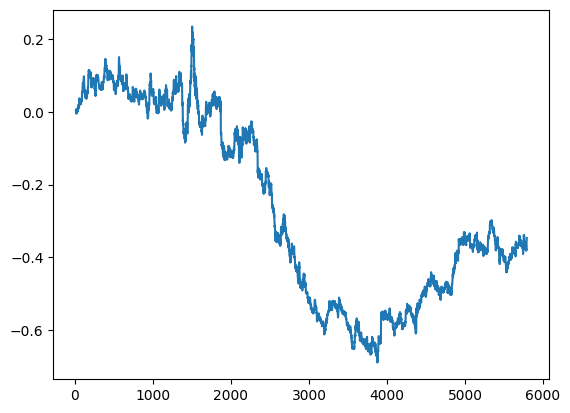

In [ ]:
# Buy when the price breaks above the upper Bollinger Band
df['buy_signal'] = df['Close'] > df['upper_band']
df.loc[df['buy_signal'] == True, 'Position'] = 1

# Sell when the price drops below the 20-day moving average
df['sell_signal'] = df['Close'] < df['ma20']
df.loc[df['sell_signal'] == True, 'Position'] = -1

# Forward fill the position column to ensure we hold onto our position
# until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()

In [ ]:
import tapy as ta
from tapy import Indicators

i = Indicators(df)
i.fractals(column_name_high='fractal_high', column_name_low='fractal_low')
df = i.df

# Buy when the price breaks above the fractal high
df['buy_signal1'] = df['Close'] > df['fractal_high']
df.loc[df['buy_signal1'] == True, 'Position'] = 1

# Sell when the price drops below the fractal low
df['sell_signal1'] = df['Close'] < df['fractal_low']
df.loc[df['sell_signal1'] == True, 'Position'] = -1

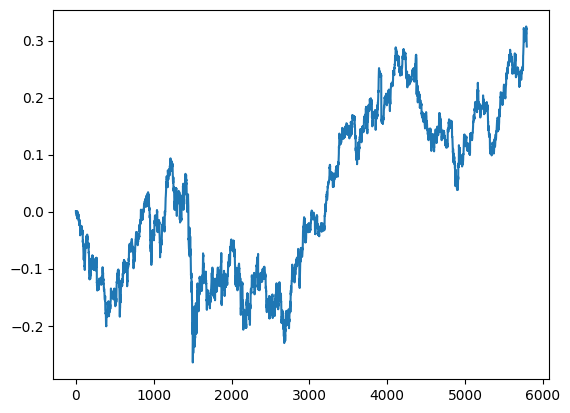

In [ ]:

# Forward fill the position column to ensure we hold onto our position until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()


In [ ]:
i = Indicators(df)
i.fractals(column_name_high='fractals_high', column_name_low='fractals_low')
df = i.df
df.tail()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,43.126400,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,36.773283,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,36.225951,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,35.100701,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,113.925001,113.925001,116.004784,111.845217,False,1.0,True,-0.001790,False,False,True,False,False,False
5792,111.500000,112.050003,110.599998,111.099998,111.099998,29622,2024,4,11,9,0,32.643692,111.733743,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,113.772501,113.772501,116.184652,111.360349,False,1.0,True,-0.004034,False,False,True,False,False,False


In [ ]:
VSignal = [0] * len(df)
vbackcandles = 1
for row in range(vbackcandles+1, len(df)):
    VSignal[row] = 1
    for i in range(row-vbackcandles, row):
        if df.Volume[row]<df.Volume[i] and df.Volume[row-1]<df.Volume[row-2]:
            VSignal[row]=0
df['VSignal']=VSignal


In [ ]:
PriceSignal = [0]*len(df)
pbackcandles = 4
for row in range(pbackcandles, len(df)):
    PriceSignal[row] = 1
    for i in range(row-pbackcandles, row):
        if df.EMASignal[row] == 1: #downtrend
            if df.Open[row]<=df.Close[row]: #downcandle row
                PriceSignal[row]=0
            elif df.Open[i]>df.Close[i]: #downcandle i we are looking for 4 upcandles
                PriceSignal[row]=0
        if df.EMASignal[row] == 2: #uptrend
            if df.Open[row]>=df.Close[row]: #upcandle row
                PriceSignal[row]=0
            elif df.Open[i]<df.Close[i]: #upcandle i we are looking for 4 dowcandles
                PriceSignal[row]=0
        else:
            PriceSignal[row] = 0

df['PriceSignal']=PriceSignal


In [ ]:
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    if df.EMASignal[row]==1 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=1
    if df.EMASignal[row]==2 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=2

df['TotSignal']=TotSignal


In [ ]:
SLSignal = [0] * len(df)
SLbackcandles = 4
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.EMASignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.EMASignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi

df['SLSignal']=SLSignal

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,42.153834,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,43.126400,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,36.773283,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,36.225951,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,35.100701,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,113.925001,113.925001,116.004784,111.845217,False,1.0,True,-0.001790,False,False,True,False,False,False,0,0,0,0.0


In [ ]:
grid_distance = 0.005
midprice = df['High'].median()

In [ ]:
def generate_grid(midprice, grid_distance, grid_range):
    return (np.arange(midprice-grid_range, midprice+grid_range, grid_distance))

grid = generate_grid(midprice=midprice, grid_distance=grid_distance, grid_range=0.1)
grid


array([91.27000275, 91.27500275, 91.28000275, 91.28500275, 91.29000275,
       91.29500275, 91.30000275, 91.30500275, 91.31000275, 91.31500275,
       91.32000275, 91.32500275, 91.33000275, 91.33500275, 91.34000275,
       91.34500275, 91.35000275, 91.35500275, 91.36000275, 91.36500275,
       91.37000275, 91.37500275, 91.38000275, 91.38500275, 91.39000275,
       91.39500275, 91.40000275, 91.40500275, 91.41000275, 91.41500275,
       91.42000275, 91.42500275, 91.43000275, 91.43500275, 91.44000275,
       91.44500275, 91.45000275, 91.45500275, 91.46000275, 91.46500275])

In [ ]:
signal = [0]*len(df)
i=0
for index, row in df.iterrows():
    for p in grid:
        if min(row.Low, row.High)<p and max(row.Low, row.High)>p:
            signal[i]=1
    i+=1

In [ ]:
df["grid_signal"]=signal
df[df["grid_signal"]==1]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal
37,92.290001,92.309998,91.110001,91.379997,91.379997,92719,2021,6,28,10,0,36.036907,91.776616,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.237499,92.237499,92.980032,91.494966,False,1.0,True,-0.003272,False,False,True,False,False,False,1,0,0,0.0,1
38,91.410004,91.449997,91.110001,91.389999,91.389999,80790,2021,6,28,11,0,36.244400,91.621970,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.199999,92.199999,93.029144,91.370855,False,1.0,True,0.000109,False,False,True,False,False,False,1,0,0,0.0,1
39,91.300003,91.410004,91.019997,91.360001,91.360001,77369,2021,6,28,12,0,35.868576,91.517182,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,2.0,0,0,92.120499,92.120499,92.951655,91.289344,False,1.0,True,-0.000328,False,False,True,False,False,False,0,0,0,0.0,1
40,91.160004,91.690002,91.019997,91.599998,91.599998,62198,2021,6,28,13,0,41.128026,91.550309,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,2.0,0,0,92.071499,92.071499,92.904069,91.238930,False,1.0,True,0.002627,False,False,True,False,False,False,0,0,0,0.0,1
41,91.470001,91.690002,91.430000,91.510002,91.510002,74119,2021,6,28,14,0,39.809590,91.534186,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.031499,92.031499,92.890831,91.172168,False,1.0,True,-0.000982,False,False,True,False,False,False,1,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,91.480003,91.500000,91.220001,91.360001,91.360001,37832,2023,11,13,11,0,43.395074,91.359290,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,91.819001,91.819001,93.098859,90.539143,False,1.0,True,-0.001421,False,False,True,False,False,False,1,0,0,0.0,1
4970,91.349998,91.349998,90.940002,91.269997,91.269997,29709,2023,11,13,12,0,41.957613,91.323573,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,91.775500,91.775500,93.067840,90.483161,False,1.0,True,-0.000985,False,True,True,False,False,True,1,0,0,0.0,1
4971,91.339996,91.339996,91.120003,91.300003,91.300003,27128,2023,11,13,13,0,42.639800,91.314145,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,2.0,0,0,91.731501,91.731501,93.025677,90.437324,False,1.0,True,0.000329,False,False,True,False,False,False,0,0,0,0.0,1
4972,91.290001,91.629997,91.250000,91.470001,91.470001,33443,2023,11,13,14,0,46.477818,91.376487,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,2.0,2,2,91.685001,91.685001,92.946167,90.423834,False,1.0,True,0.001862,False,False,True,False,False,False,1,0,0,0.0,1


In [ ]:
df['Heiken_Close'] = (df.Open+df.Close+df.High+df.Low)/4
df['Heiken_Open'] = df['Open']
for i in range(1, len(df)):
    df['Heiken_Open'][i] = (df.Heiken_Open[i-1]+df.Heiken_Close[i-1])/2

df['Heiken_High'] = df[['High', 'Heiken_Open', 'Heiken_Close']].max(axis=1)
df['Heiken_Low'] = df[['Low', 'Heiken_Open', 'Heiken_Close']].min(axis=1)
df.head(10)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-468-c16c4ce06fc0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-468-c16c4ce06fc0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-468-c16c4ce06fc0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<i

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,42.153834,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,42.153834,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002
5,92.910004,93.059998,92.650002,92.809998,92.809998,108154,2021,6,22,14,0,42.153834,92.843599,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,-0.001506,True,False,True,False,True,False,1,0,0,0.0,0,92.857500,92.902031,93.059998,92.650002
6,92.919998,93.019997,92.500000,92.599998,92.599998,153315,2021,6,22,15,0,42.153834,92.746159,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,2.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,-0.002263,False,False,True,False,False,False,1,0,0,0.0,0,92.759998,92.879766,93.019997,92.500000
7,92.889999,92.980003,92.500000,92.870003,92.870003,95935,2021,6,22,16,0,42.153834,92.795696,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,0.002916,False,False,True,False,False,False,1,0,0,0.0,0,92.810001,92.819882,92.980003,92.500000
8,92.839996,93.080002,92.660004,92.970001,92.970001,92772,2021,6,22,17,0,42.153834,92.865418,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,2,92.5735,92.5735,93.259715,91.887284,False,1.0,False,0.001077,False,False,True,False,False,False,0,0,0,0.0,0,92.887501,92.814942,93.080002,92.660004
9,92.940002,93.339996,92.510002,92.639999,92.639999,55226,2021,6,23,9,0,42.153834,92.775251,0,1,93.340996,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.5735,92.5735,93.259715,91.887284,False,1.0,False,-0.003550,True,False,True,False,True,False,0,0,0,0.0,0,92.857500,92.851221,93.339996,92.510002


In [ ]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate Exponential Moving Averages (EMAs) and RSI
df["EMA20"] = ta.ema(df.Close, length=20)
df["EMA50"] = ta.ema(df.Close, length=50)
df['RSI'] = ta.rsi(df.Close, length=12)

# Fill missing values for the specified columns using backfill
columns_to_fill = ["EMA20", "EMA50", "RSI"]
df[columns_to_fill] = df[columns_to_fill].fillna(method='bfill')


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,32.064929,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,113.925001,113.925001,116.004784,111.845217,False,1.0,True,-0.001790,False,False,True,False,False,False,0,0,0,0.0,0,111.637499,112.640821,112.640821,111.

In [ ]:
import plotly.graph_objects as go
from datetime import datetime
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=df['Heiken_Open'],
                high=df['Heiken_High'],
                low=df['Heiken_Low'],
                close=df['Heiken_Close']),
                     go.Scatter(x=df.index, y=df.EMA20, line=dict(color='red', width=1), name="EMA20"),
                     go.Scatter(x=df.index, y=df.EMA50, line=dict(color='blue', width=1), name="EMA50")])

fig.show()

In [ ]:
def totalSignal(df):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if (df.EMA20[i]>df.EMA50[i] and df.Heiken_Open[i]<df.EMA20[i]
            and df.Heiken_Close[i]>df.EMA20[i]):
            ordersignal[i]=2
        if (df.EMA20[i]<df.EMA50[i] and df.Heiken_Open[i]>df.EMA20[i]
            and df.Heiken_Close[i]<df.EMA20[i]):
            ordersignal[i]=1
    df['ordersignal']=ordersignal

totalSignal(df)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800,0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800,0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800,0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800,0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796,0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353,0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065,0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,32.064929,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,113.925001,113.925001,116.004784,111.845217,False,1.0,True,-0.001790,False,False,True,False,False,False,0,0,0,0.0,0,111.6

In [ ]:
# StopLoss from signal
SLSignal = [0] * len(df)
SLbackcandles = 1
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.ordersignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.ordersignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi

df['SLSignal_heiken']=SLSignal# StopLoss from signal
SLSignal = [0] * len(df)
SLbackcandles = 1
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.ordersignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.ordersignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi

df['SLSignal_heiken']=SLSignal

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800,0,0.0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800,0,0.0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800,0,0.0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800,0,0.0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796,0,0.0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353,0,0.0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065,0,0.0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,32.064929,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,113.925001,113.925001,116.004784,111.845217,False,1.0,True,-0.001790,

In [ ]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate ADX
a = ta.adx(df.High, df.Low, df.Close, length=14)

# Join ADX_14 column to the DataFrame
df = df.join(a.ADX_14)

# Fill missing values for ADX_14 column using backfill
df['ADX_14'].fillna(method='bfill', inplace=True)


In [ ]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal1'] = emasignal

addemasignal(df,6)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800,0,0.0,13.801525,0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800,0,0.0,13.801525,0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800,0,0.0,13.801525,0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800,0,0.0,13.801525,0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800,0,0.0,13.801525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796,0,0.0,21.687270,0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353,0,0.0,22.407966,0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065,0,0.0,22.804157,0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,32.064929,112.156239,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.0044016

In [ ]:
def totalSignal(df, ADX):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if  df.RSI[i]<=25 and ADX[i]>=20 and df.EMASignal[i]==2:
            ordersignal[i]=2
    df['long_signal']=ordersignal

totalSignal(df, df.ADX_14)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800,0,0.0,13.801525,0,0
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800,0,0.0,13.801525,0,0
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800,0,0.0,13.801525,0,0
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800,0,0.0,13.801525,0,0
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800,0,0.0,13.801525,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796,0,0.0,21.687270,0,0
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353,0,0.0,22.407966,0,0
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065,0,0.0,22.804157,0,0
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,2024,4,10,17,0,32.064929,112.156239,0,0,N

In [ ]:
import numpy as np
df['martiangle_signal'] = np.random.random(len(df))
df['martiangle_signal'] = df['martiangle_signal'].apply(lambda x: 1 if x<0.5 else 2)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal,martiangle_signal
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800,0,0.0,13.801525,0,0,2
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800,0,0.0,13.801525,0,0,2
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800,0,0.0,13.801525,0,0,2
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800,0,0.0,13.801525,0,0,2
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800,0,0.0,13.801525,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796,0,0.0,21.687270,0,0,2
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353,0,0.0,22.407966,0,0,1
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,NaN,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065,0,0.0,22.804157,0,0,2
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,202

In [ ]:
df['Trend'].fillna('4.0', inplace=True)


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low,EMA20,EMA50,ordersignal,SLSignal_heiken,ADX_14,EMASignal1,long_signal,martiangle_signal
0,93.610001,93.690002,92.779999,92.900002,92.900002,173571,2021,6,22,9,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,NaN,False,False,True,False,False,False,0,0,0,0.0,0,93.245001,93.610001,93.690002,92.779999,92.573500,92.107800,0,0.0,13.801525,0,0,2
1,93.129997,93.320000,92.779999,92.970001,92.970001,139318,2021,6,22,10,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000753,False,False,True,False,False,False,0,0,0,0.0,0,93.049999,93.427501,93.427501,92.779999,92.573500,92.107800,0,0.0,13.801525,0,0,2
2,92.980003,93.180000,92.650002,92.660004,92.660004,99647,2021,6,22,11,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,-0.003334,False,False,True,False,False,False,0,0,0,0.0,0,92.867502,93.238750,93.238750,92.650002,92.573500,92.107800,0,0.0,13.801525,0,0,2
3,93.010002,93.040001,92.639999,92.709999,92.709999,89767,2021,6,22,12,0,29.500529,92.810001,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.000540,False,True,True,False,False,True,0,0,0,0.0,0,92.850000,93.053126,93.053126,92.639999,92.573500,92.107800,0,0.0,13.801525,0,0,2
4,92.790001,93.019997,92.650002,92.949997,92.949997,65674,2021,6,22,13,0,29.500529,92.866000,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,3.0,0,0,92.573500,92.573500,93.259715,91.887284,False,1.0,False,0.002589,False,False,True,False,False,False,0,0,0,0.0,0,92.852499,92.951563,93.019997,92.650002,92.573500,92.107800,0,0.0,13.801525,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,114.699997,114.800003,112.650002,112.900002,112.900002,70286,2024,4,10,14,0,40.510354,113.934436,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,1.0,0,0,114.340001,114.340001,115.284774,113.395227,False,1.0,True,-0.016122,False,False,True,False,False,False,1,0,0,0.0,0,113.762501,114.664061,114.800003,112.650002,114.013848,112.549796,0,0.0,21.687270,0,0,2
5789,112.900002,112.900002,111.349998,111.849998,111.849998,130085,2024,4,10,15,0,33.816435,113.100661,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,4.0,0,0,114.202501,114.202501,115.632002,112.772999,False,1.0,True,-0.009300,False,True,True,False,False,True,1,0,0,0.0,0,112.250000,114.213281,114.213281,111.349998,113.807767,112.522353,0,0.0,22.407966,0,0,1
5790,111.800003,113.099998,111.550003,111.750000,111.750000,110488,2024,4,10,16,0,33.245691,112.560396,0,0,NaN,0,0,0,0,0,0,0,0,0,"(0.004401657562391835, 76.04006130388589, 0.00...",0,0,4.0,0,0,114.067501,114.067501,115.845498,112.289503,False,1.0,True,-0.000894,False,False,True,False,False,False,1,0,0,0.0,0,112.050001,113.231640,113.231640,111.550003,113.611789,112.492065,0,0.0,22.804157,0,0,2
5791,111.699997,111.849998,111.449997,111.550003,111.550003,61588,202

In [ ]:
df['Strategy Returns'].isna().sum()

1

In [ ]:
df['Strategy Returns'].dropna(inplace=True)

In [ ]:
df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
                    ..
SLSignal_heiken      0
ADX_14               0
EMASignal1           0
long_signal          0
martiangle_signal    0
Length: 62, dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame containing OHLC data

# Calculate the difference between the current 'Close' and the previous 'Close'
df['Close_diff'] = df['Close'].diff()

# Create a new column indicating whether the candle is up or down from the previous one
df['Candle_direction'] = 'Up'  # By default, set all candles to 'Up'

# Set 'Candle_direction' to 'Down' for candles with a negative 'Close_diff'
df.loc[df['Close_diff'] < 0, 'Candle_direction'] = 'Down'

# Replace 'Up' by 1 and 'Down' by 2
df['Candle_direction'].replace({'Up': 1, 'Down': 2}, inplace=True)

# Drop the 'Close_diff' column if you don't need it anymore
df.drop(columns=['Close_diff'], inplace=True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5793 entries, 0 to 5792
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    5793 non-null   float64
 1   High                    5793 non-null   float64
 2   Low                     5793 non-null   float64
 3   Close                   5793 non-null   float64
 4   Adj Close               5793 non-null   float64
 5   Volume                  5793 non-null   int64  
 6   Year                    5793 non-null   int32  
 7   Month                   5793 non-null   int32  
 8   Day                     5793 non-null   int32  
 9   Hour                    5793 non-null   int32  
 10  Minute                  5793 non-null   int32  
 11  RSI                     5793 non-null   float64
 12  EMA                     5793 non-null   float64
 13  EMASignal               5793 non-null   int64  
 14  isPivot                 5793 non-null   

In [ ]:
df_cleaned=df.drop(['Open','High','Low','Close','Adj Close',
                  'Volume','RSI','EMA','ma20','middle_band','upper_band'
                  ,'lower_band','Strategy Returns','Heiken_Close','Heiken_Open',
                  'Heiken_High','Heiken_Low','EMA20','EMA50','ADX_14','pointpos','Channel','Trend'],axis='columns')

In [ ]:
df_cleaned

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2021,6,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,False,True,False,False,False,0,0,0,0.0,0,0,0.0,0,0,2,1
1,2021,6,22,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,False,True,False,False,False,0,0,0,0.0,0,0,0.0,0,0,2,1
2,2021,6,22,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,False,True,False,False,False,0,0,0,0.0,0,0,0.0,0,0,2,2
3,2021,6,22,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,True,True,False,False,True,0,0,0,0.0,0,0,0.0,0,0,2,1
4,2021,6,22,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,False,False,False,True,False,False,False,0,0,0,0.0,0,0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,2024,4,10,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,1,0,0,0.0,0,0,0.0,0,0,2,2
5789,2024,4,10,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,True,True,False,False,True,1,0,0,0.0,0,0,0.0,0,0,1,2
5790,2024,4,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,1,0,0,0.0,0,0,0.0,0,0,2,2
5791,2024,4,10,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.0,True,False,False,True,False,False,False,0,0,0,0.0,0,0,0.0,0,0,2,2


In [ ]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5793 entries, 0 to 5792
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    5793 non-null   int32  
 1   Month                   5793 non-null   int32  
 2   Day                     5793 non-null   int32  
 3   Hour                    5793 non-null   int32  
 4   Minute                  5793 non-null   int32  
 5   EMASignal               5793 non-null   int64  
 6   isPivot                 5793 non-null   int64  
 7   CHOCH_pattern_detected  5793 non-null   int64  
 8   fibonacci_signal        5793 non-null   int64  
 9   SL                      5793 non-null   int64  
 10  TP                      5793 non-null   int64  
 11  MinSwing                5793 non-null   int64  
 12  MaxSwing                5793 non-null   int64  
 13  LBD_detected            5793 non-null   int64  
 14  LBH_detected            5793 non-null   

In [ ]:
df = df_cleaned.dropna()

In [ ]:
# Create a boolean DataFrame indicating the locations of NaN values
na_locations = df.isna()

# Get the row and column indices where NaN values occur
rows, cols = np.where(na_locations)

# Print the row and column indices of NaN values
for row, col in zip(rows, cols):
    print(f"NaN value found at row {row} and column {col}")


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'specific_column' is the name of the column you want to modify
# Replace 'specific_column' with the actual name of your column

df_cleaned['Candle_direction'] = df_cleaned['Candle_direction'].replace(2, 0)


In [ ]:
import pandas as pd

# Convert boolean column to integer
df_cleaned['buy_signal'] = df_cleaned['buy_signal'].astype(int)
df_cleaned['sell_signal'] = df_cleaned['sell_signal'].astype(int)
df_cleaned['fractal_high'] = df_cleaned['fractal_high'].astype(int)
df_cleaned['fractal_low'] = df_cleaned['fractal_low'].astype(int)
df_cleaned['buy_signal1'] = df_cleaned['buy_signal1'].astype(int)
df_cleaned['sell_signal1'] = df_cleaned['sell_signal1'].astype(int)
df_cleaned['fractals_high'] = df_cleaned['fractals_high'].astype(int)
df_cleaned['fractals_low'] = df_cleaned['fractals_low'].astype(int)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import numpy as np
np.random.seed(0)

In [ ]:
# Selecting the subset of columns for features
X = df_cleaned.drop(['Candle_direction'],axis='columns')


# Extracting the target variable
y = df_cleaned['Candle_direction']

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=20,      # how many epochs to wait before stopping
    restore_best_weights=True
)

# Initialize the NN
model = Sequential()

# Adding layers with Batch Normalization and Dropout
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=39))
model.add(BatchNormalization())
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN with a custom optimizer
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN with validation split and early stopping callback
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.2)


Epoch 1/150
116/116 [==============================] - 2s 6ms/step - loss: 0.9209 - accuracy: 0.5036 - val_loss: 4.0020 - val_accuracy: 0.4660
Epoch 2/150
116/116 [==============================] - 0s 4ms/step - loss: 0.8521 - accuracy: 0.4942 - val_loss: 1.0499 - val_accuracy: 0.4660
Epoch 3/150
116/116 [==============================] - 0s 4ms/step - loss: 0.8170 - accuracy: 0.5028 - val_loss: 0.7088 - val_accuracy: 0.5415
Epoch 4/150
116/116 [==============================] - 0s 4ms/step - loss: 0.7738 - accuracy: 0.5166 - val_loss: 0.7603 - val_accuracy: 0.5383
Epoch 5/150
116/116 [==============================] - 0s 4ms/step - loss: 0.7794 - accuracy: 0.5080 - val_loss: 0.7057 - val_accuracy: 0.5297
Epoch 6/150
116/116 [==============================] - 0s 4ms/step - loss: 0.7423 - accuracy: 0.5115 - val_loss: 0.6951 - val_accuracy: 0.5221
Epoch 7/150
116/116 [==============================] - 0s 4ms/step - loss: 0.7404 - accuracy: 0.5061 - val_loss: 0.7136 - val_accuracy: 0.4854

In [ ]:
'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

def create_fnn_model(input_shape):
    # Early stopping callback
    early_stopping = callbacks.EarlyStopping(
        min_delta=0.001,  # minimum amount of change to count as an improvement
        patience=20,      # how many epochs to wait before stopping
        restore_best_weights=True
    )

    # Initialize the NN
    model = Sequential()

    # Adding layers with Batch Normalization and Dropout
    model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the ANN with a custom optimizer
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Assuming X_train and y_train are your training data
# Replace input_shape with the shape of your input features
input_shape = (X_train.shape[1],)  # Assuming X_train is a numpy array
fnn_model = create_fnn_model(input_shape)

# Train the ANN with validation split and early stopping callback
history = fnn_model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.2)'''


"import tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout, BatchNormalization\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras import callbacks\n\ndef create_fnn_model(input_shape):\n    # Early stopping callback\n    early_stopping = callbacks.EarlyStopping(\n        min_delta=0.001,  # minimum amount of change to count as an improvement\n        patience=20,      # how many epochs to wait before stopping\n        restore_best_weights=True\n    )\n\n    # Initialize the NN\n    model = Sequential()\n\n    # Adding layers with Batch Normalization and Dropout\n    model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_shape=input_shape))\n    model.add(BatchNormalization())\n    model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))\n    model.add(BatchNormalization())\n    model.add(Dense(units=64, kernel_initializer='he_uniform', activation='rel

In [ ]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

class DRLAgent:
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(128, input_dim=self.input_dim, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.output_dim, activation='sigmoid'))  # Sigmoid for binary classification
        model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Binary crossentropy for binary classification
        return model

    def train(self, X, y, batch_size=32, epochs=150, validation_split=0.2, callbacks_list=[]):
        history = self.model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=callbacks_list)
        return history

# Assuming X_train and y_train are your training data
# Replace input_dim with the number of features and output_dim with the number of actions
input_dim = X_train.shape[1]
output_dim = 1  # Assuming you have one action (binary classification)
drl_agent = DRLAgent(input_dim, output_dim)

# Train the DRL model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = drl_agent.train(X_train_scaled, y_train, validation_split=0.2)'''


"import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras import callbacks\n\nclass DRLAgent:\n    def __init__(self, input_dim, output_dim):\n        self.input_dim = input_dim\n        self.output_dim = output_dim\n        self.model = self._build_model()\n\n    def _build_model(self):\n        model = Sequential()\n        model.add(Dense(128, input_dim=self.input_dim, activation='relu'))\n        model.add(Dense(128, activation='relu'))\n        model.add(Dense(self.output_dim, activation='sigmoid'))  # Sigmoid for binary classification\n        model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Binary crossentropy for binary classification\n        return model\n\n    def train(self, X, y, batch_size=32, epochs=150, validation_split=0.2, callbacks_list=[]):\n        history = self.mo

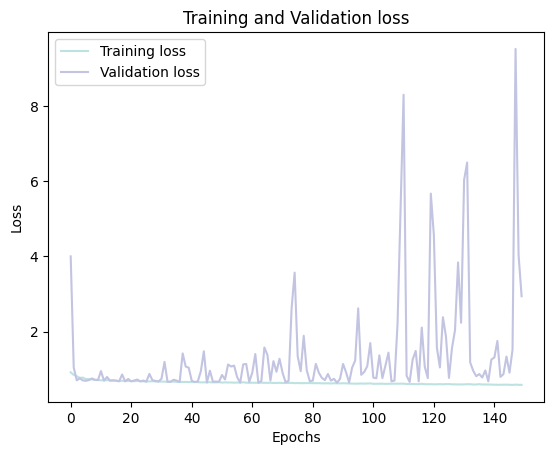

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

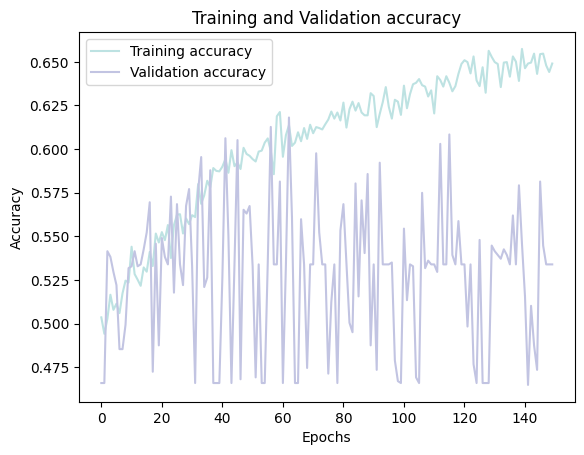

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
#y_pred = (y_pred > 0.65)

37/37 [==============================] - 0s 2ms/step


In [ ]:
X_test_new=X_test.reset_index(drop=True)
X_train

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal
0,2022,5,16,15,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,1,77.809998,0,0,2
1,2022,3,15,10,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0.0,0,1,74.459999,0,0,2
2,2021,12,13,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0.000000,0,0,2
3,2022,9,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,2
4,2021,7,15,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0.000000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,2024,3,20,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,1
1155,2022,12,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,2
1156,2021,7,22,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,1
1157,2021,8,12,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,1


In [ ]:
import numpy as np

# Assuming 2023, 8, 30, 5, 0 are the values you want to predict on
input_data = np.array([[2024,3, 4 , 16, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                       ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Convert the values into a 2D array

# Perform prediction
prediction = model.predict(input_data)

print(prediction)


1/1 [==============================] - 0s 114ms/step
[[0.9992738]]


In [ ]:
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)
print(y_pred)


[[0.9760206 ]
 [0.970375  ]
 [0.9928685 ]
 [0.9969485 ]
 [0.99841744]
 [0.9948212 ]
 [0.96559465]
 [0.9982731 ]
 [0.99809325]
 [0.99698514]
 [0.9991896 ]
 [0.99427795]
 [1.        ]
 [0.99905336]
 [0.99996024]
 [0.99461764]
 [0.994624  ]
 [0.99660987]
 [0.99792325]
 [0.9923753 ]
 [0.98801476]
 [0.99955904]
 [0.99545026]
 [0.99934834]
 [0.99483335]
 [0.98714226]
 [0.99874073]
 [0.9976376 ]
 [0.9884499 ]
 [0.99933845]
 [0.9872035 ]
 [0.9987087 ]
 [0.9999369 ]
 [0.99994785]
 [0.99631464]
 [0.99995357]
 [0.9988512 ]
 [0.99733585]
 [0.99695164]
 [0.9999417 ]
 [0.99908507]
 [0.99634755]
 [0.99716824]
 [0.99437606]
 [0.99959165]
 [0.99993867]
 [0.9982042 ]
 [0.98717546]
 [0.9999993 ]
 [0.9882369 ]
 [0.99945223]
 [0.99999994]
 [0.9997884 ]
 [0.9998188 ]
 [0.9999979 ]
 [0.997353  ]
 [0.9964088 ]
 [0.99915963]
 [0.9981804 ]
 [0.9972897 ]
 [0.9983429 ]
 [0.99734604]
 [0.9925451 ]
 [0.9983744 ]
 [0.998214  ]
 [0.9973348 ]
 [0.99826694]
 [0.99506664]
 [0.9908906 ]
 [0.99752176]
 [0.9999998 ]
 [0.99

In [ ]:
import pandas as pd

# Convert the array to a Series
y_pred_series = pd.Series(y_pred.flatten())

# Print the Series
print(y_pred_series)


0       0.976021
1       0.970375
2       0.992868
3       0.996948
4       0.998417
          ...   
1154    0.992002
1155    0.999954
1156    0.998354
1157    0.997905
1158    0.999754
Length: 1159, dtype: float32


In [ ]:
y_pred_mean=y_pred_series.mean()
y_pred_mean

0.99644595

In [ ]:
y_pred_new = (y_pred > y_pred_mean)

In [ ]:
import pandas as pd

# Convert the array to a Series
y_pred_new_series = pd.Series(y_pred_new.flatten())

# Print the Series
print(y_pred_new_series)

0       False
1       False
2       False
3        True
4        True
        ...  
1154    False
1155     True
1156     True
1157     True
1158     True
Length: 1159, dtype: bool


In [ ]:
pd.set_option('display.max_columns', None)
y_test

1891    0
1550    0
1049    0
2523    0
156     0
       ..
5686    1
3090    0
203     0
339     1
837     1
Name: Candle_direction, Length: 1159, dtype: int64

In [ ]:
concatenated_df = pd.concat([y_pred_new_series, X_test_new],axis='columns')

In [ ]:
import pandas as pd

# Assuming you have DataFrame df with columns 'Year', 'Month', 'Day', 'Hour', and 'Minute'
# Create a DataFrame with these columns
date_time_df = pd.DataFrame({
    'Year': concatenated_df['Year'],
    'Month': concatenated_df['Month'],
    'Day': concatenated_df['Day'],
    'Hour': concatenated_df['Hour'],
    'Minute': concatenated_df['Minute']
})

# Concatenate date and time columns into a single string column
if 'Hour' in concatenated_df.columns and 'Minute' in concatenated_df.columns:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df)
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')  # No timezone specified here
else:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df[['Year', 'Month', 'Day']])
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d')  # No timezone specified here

# Convert the DataFrame to a datetime index
date_time_index = pd.to_datetime(date_time_df['DateTime'], utc=True)  # Make the index timezone aware

# Assign the datetime index back to your DataFrame
concatenated_df.index = date_time_index

# Drop the date-time features columns if needed
if 'Hour' in concatenated_df.columns and 'Minute' in concatenated_df.columns:
    concatenated_df = concatenated_df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
else:
    concatenated_df = concatenated_df.drop(columns=['Year', 'Month', 'Day'])

In [ ]:
concatenated_df

,0,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-16 15:00:00+00:00,False,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,1,77.809998,0,0,2
2022-03-15 10:00:00+00:00,False,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0.0,0,1,74.459999,0,0,2
2021-12-13 17:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0.000000,0,0,2
2022-09-02 15:00:00+00:00,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,2
2021-07-15 12:00:00+00:00,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0.000000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20 17:00:00+00:00,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,1
2022-12-12 13:00:00+00:00,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,2
2021-07-22 14:00:00+00:00,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0.0,0,0,0.000000,0,0,1


In [ ]:
df

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2021,6,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,1
1,2021,6,22,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,1
2,2021,6,22,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,2
3,2021,6,22,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,1,1,0,0,1,0,0,0,0.0,0,0,0.0,0,0,2,1
4,2021,6,22,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,2024,4,10,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0.0,0,0,0.0,0,0,2,2
5789,2024,4,10,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0.0,0,0,0.0,0,0,1,2
5790,2024,4,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0.0,0,0,0.0,0,0,2,2
5791,2024,4,10,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,2


In [ ]:
df['buy_signal'] = df['buy_signal'].astype(int)
df['sell_signal'] = df['sell_signal'].astype(int)
df['fractal_high'] = df['fractal_high'].astype(int)
df['fractal_low'] = df['fractal_low'].astype(int)
df['buy_signal1'] = df['buy_signal1'].astype(int)
df['sell_signal1'] = df['sell_signal1'].astype(int)
df['fractals_high'] = df['fractals_high'].astype(int)
df['fractals_low'] = df['fractals_low'].astype(int)

In [ ]:
'''import pandas as pd

# Assuming you have DataFrame df with columns 'Year', 'Month', 'Day', 'Hour', and 'Minute'
# Create a DataFrame with these columns
date_time_df = pd.DataFrame({
    'Year': df['Year'],
    'Month': df['Month'],
    'Day': df['Day'],
    'Hour': df['Hour'],
    'Minute': df['Minute']
})

# Concatenate date and time columns into a single string column
if 'Hour' in df.columns and 'Minute' in df.columns:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df)
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')  # No timezone specified here
else:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df[['Year', 'Month', 'Day']])
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d')  # No timezone specified here

# Convert the DataFrame to a datetime index
date_time_index = pd.to_datetime(date_time_df['DateTime'], utc=True)  # Make the index timezone aware

# Assign the datetime index back to your DataFrame
df.index = date_time_index

# Drop the date-time features columns if needed
if 'Hour' in df.columns and 'Minute' in df.columns:
    df = df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
else:
    df = df.drop(columns=['Year', 'Month', 'Day'])'''


"import pandas as pd\n\n# Assuming you have DataFrame df with columns 'Year', 'Month', 'Day', 'Hour', and 'Minute'\n# Create a DataFrame with these columns\ndate_time_df = pd.DataFrame({\n    'Year': df['Year'],\n    'Month': df['Month'],\n    'Day': df['Day'],\n    'Hour': df['Hour'],\n    'Minute': df['Minute']\n})\n\n# Concatenate date and time columns into a single string column\nif 'Hour' in df.columns and 'Minute' in df.columns:\n    date_time_df['DateTime'] = pd.to_datetime(date_time_df)\n    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')  # No timezone specified here\nelse:\n    date_time_df['DateTime'] = pd.to_datetime(date_time_df[['Year', 'Month', 'Day']])\n    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d')  # No timezone specified here\n\n# Convert the DataFrame to a datetime index\ndate_time_index = pd.to_datetime(date_time_df['DateTime'], utc=True)  # Make the index timezone aware\n\n# Assign the datetime 

In [ ]:
df

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2021,6,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,1
1,2021,6,22,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,1
2,2021,6,22,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,2
3,2021,6,22,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,1,1,0,0,1,0,0,0,0.0,0,0,0.0,0,0,2,1
4,2021,6,22,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,2024,4,10,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0.0,0,0,0.0,0,0,2,2
5789,2024,4,10,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0.0,0,0,0.0,0,0,1,2
5790,2024,4,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0.0,0,0,0.0,0,0,2,2
5791,2024,4,10,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0,0,2,2


In [ ]:
df['CHOCH_pattern_detected'].unique()

array([0, 1])

In [ ]:
import pandas as pd

# Concatenate the two DataFrames along axis 0 (rows)
# This will stack the DataFrames on top of each other
concatenated_df_new = pd.concat([concatenated_df, df_new], axis='columns')
concatenated_df_new=concatenated_df_new.drop(columns=['EMASignal', 'isPivot', 'CHOCH_pattern_detected',
                                  'fibonacci_signal','MinSwing','MaxSwing','SL','TP',
                                 'LBD_detected','LBH_detected','SR_signal','isBreakOut','candlestick_signal',
                                 'result','signal1','buy_signal','Position','sell_signal','fractal_high',
                                 'fractals_low','VSignal','PriceSignal','TotSignal','SLSignal','grid_signal',
                                 'ordersignal','SLSignal_heiken','EMASignal1','long_signal','martiangle_signal',
                                                     'fractal_low','buy_signal1','sell_signal1','fractals_high'])




In [ ]:
concatenated_df_new=concatenated_df_new.fillna(0)

In [ ]:
import pandas as pd

# Convert boolean column 'A' to integer
concatenated_df_new[0] = concatenated_df_new[0].astype(int)

# Display the DataFrame after conversion

#concatenated_df_new = concatenated_df_new[concatenated_df_new['Volume'] != 0]
concatenated_df_new = concatenated_df_new[(concatenated_df_new[['Open', 'Close', 'High', 'Low']] != 0).all(axis=1)]
concatenated_df_new

,0,Open,High,Low,Close,Adj Close,Volume
2021-06-22 07:00:00+00:00,0,93.610001,93.690002,92.779999,92.900002,92.900002,173571.0
2021-06-22 08:00:00+00:00,0,93.129997,93.320000,92.779999,92.970001,92.970001,139318.0
2021-06-22 09:00:00+00:00,0,92.980003,93.180000,92.650002,92.660004,92.660004,99647.0
2021-06-22 10:00:00+00:00,0,93.010002,93.040001,92.639999,92.709999,92.709999,89767.0
2021-06-22 11:00:00+00:00,0,92.790001,93.019997,92.650002,92.949997,92.949997,65674.0
...,...,...,...,...,...,...,...
2024-04-10 12:00:00+00:00,0,114.699997,114.800003,112.650002,112.900002,112.900002,70286.0
2024-04-10 13:00:00+00:00,0,112.900002,112.900002,111.349998,111.849998,111.849998,130085.0
2024-04-10 14:00:00+00:00,0,111.800003,113.099998,111.550003,111.750000,111.750000,110488.0
2024-04-10 15:00:00+00:00,0,111.699997,111.849998,111.449997,111.550003,111.550003,61588.0


In [ ]:
'''import pandas as pd
import numpy as np

# Example function to determine SL, TP, MinSwing, and MaxSwing
def calculate_trading_params(concatenated_df_new):
    SL = concatenated_df_new['Close'] * 0.95  # Stop Loss set at 5% below the closing price
    TP = concatenated_df_new['Close'] * 1.1   # Take Profit set at 10% above the closing price
    MinSwing = concatenated_df_new['Low'] * 0.99  # Minimum Swing set at 1% below the daily low
    MaxSwing = concatenated_df_new['High'] * 1.01  # Maximum Swing set at 1% above the daily high
    return SL, TP, MinSwing, MaxSwing

# Assuming you have OHLC data in a DataFrame named 'data'
# 'data' should contain columns: 'Open', 'High', 'Low', 'Close'


# Calculate trading parameters
SL, TP, MinSwing, MaxSwing = calculate_trading_params(concatenated_df_new)

# Create a DataFrame to store the results
concatenated_df_new['SL'] = SL
concatenated_df_new['TP'] = TP
concatenated_df_new['MinSwing'] = MinSwing
concatenated_df_new['MaxSwing'] = MaxSwing

concatenated_df_new'''



"import pandas as pd\nimport numpy as np\n\n# Example function to determine SL, TP, MinSwing, and MaxSwing\ndef calculate_trading_params(concatenated_df_new):\n    SL = concatenated_df_new['Close'] * 0.95  # Stop Loss set at 5% below the closing price\n    TP = concatenated_df_new['Close'] * 1.1   # Take Profit set at 10% above the closing price\n    MinSwing = concatenated_df_new['Low'] * 0.99  # Minimum Swing set at 1% below the daily low\n    MaxSwing = concatenated_df_new['High'] * 1.01  # Maximum Swing set at 1% above the daily high\n    return SL, TP, MinSwing, MaxSwing\n\n# Assuming you have OHLC data in a DataFrame named 'data'\n# 'data' should contain columns: 'Open', 'High', 'Low', 'Close'\n\n\n# Calculate trading parameters\nSL, TP, MinSwing, MaxSwing = calculate_trading_params(concatenated_df_new)\n\n# Create a DataFrame to store the results\nconcatenated_df_new['SL'] = SL\nconcatenated_df_new['TP'] = TP\nconcatenated_df_new['MinSwing'] = MinSwing\nconcatenated_df_new['MaxS

In [ ]:
#concatenated_df_new['candlestick_signal'].unique()

In [ ]:
concatenated_df_new[concatenated_df_new[0]!=0]

,0,Open,High,Low,Close,Adj Close,Volume
2021-06-23 12:00:00+00:00,1,92.139999,92.669998,92.120003,92.480003,92.480003,66106.0
2021-06-24 14:00:00+00:00,1,92.510002,92.750000,92.410004,92.570000,92.570000,143824.0
2021-06-25 12:00:00+00:00,1,91.989998,92.379997,91.980003,92.089996,92.089996,56164.0
2021-06-28 10:00:00+00:00,1,91.300003,91.410004,91.019997,91.360001,91.360001,77369.0
2021-06-29 11:00:00+00:00,1,91.000000,91.260002,90.930000,91.150002,91.150002,101024.0
...,...,...,...,...,...,...,...
2024-04-03 15:00:00+00:00,1,111.300003,111.949997,111.199997,111.849998,111.849998,119345.0
2024-04-04 10:00:00+00:00,1,114.900002,115.199997,114.699997,114.800003,114.800003,157851.0
2024-04-05 11:00:00+00:00,1,112.699997,113.000000,112.449997,112.449997,112.449997,82183.0
2024-04-10 10:00:00+00:00,1,114.750000,114.800003,114.300003,114.550003,114.550003,21392.0


In [ ]:
concatenated_df_new_filtered = concatenated_df_new['2024-04-02 02:00:00+00:00':]

In [ ]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.Low[i]>df1.Low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.Low[i]<df1.Low[i-1]):
            return 0
    return 1

#support(df,46,3,2)

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.High[i]<df1.High[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.High[i]>df1.High[i-1]):
            return 0
    return 1
#resistance(df, 30, 3, 5)


In [ ]:
len(concatenated_df_new_filtered)

64

In [ ]:
sr = []
n1=3
n2=2
for row in range(3, len(concatenated_df_new_filtered)-n2): #len(df)-n2
    if support(concatenated_df_new_filtered, row, n1, n2):
        sr.append((row,concatenated_df_new_filtered.Low[row],1))
    if resistance(concatenated_df_new_filtered, row, n1, n2):
        sr.append((row,concatenated_df_new_filtered.High[row],2))
print(sr)

[(5, 107.80000305175781, 2), (20, 115.25, 2), (29, 111.9000015258789, 1), (38, 114.75, 2)]


In [ ]:
'''import numpy as np
import plotly.graph_objects as go

# Assuming concatenated_df_new is already defined

def pointpos(concatenated_df_new_filtered):
    if concatenated_df_new_filtered[0] == 1:
        return x['Low'] + 0.5e-3
    else:
        return np.nan

concatenated_df_new_filtered['pointpos'] = pointpos(concatenated_df_new_filtered[['Open', 'Low']])

fig = go.Figure(data=[go.Candlestick(x=concatenated_df_new_filtered.index,
                open=concatenated_df_new_filtered['Open'],
                high=concatenated_df_new_filtered['High'],
                low=concatenated_df_new_filtered['Low'],
                close=concatenated_df_new_filtered['Close'])])

fig.add_scatter(x=concatenated_df_new_filtered.index,
                y=concatenated_df_new_filtered['pointpos'],
                mode="markers",
                marker=dict(size=8, color="MediumPurple", line=dict(width=1, color='DarkSlateGrey')),
                name="Signal")

for sr_entry in sr:
    fig.add_shape(type='line', x0='2024-03-01 10:00:00+00:00', y0=sr_entry[1],
                  x1='2024-03-02 10:00:00+00:00',
                  y1=sr_entry[1]
                  )

fig.update_layout(
    title="MASTER'S STRATEGY",
    xaxis_title="Date",
    yaxis_title="Price",
    autosize=False,
    width=800,
    height=700,  # Adjusted height
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgb(30,30,30)',  # Darker plot background
    font=dict(color="white"),  # White font color
    xaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
    yaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
)

fig.show()'''

'import numpy as np\nimport plotly.graph_objects as go\n\n# Assuming concatenated_df_new is already defined\n\ndef pointpos(concatenated_df_new_filtered):\n    if concatenated_df_new_filtered[0] == 1:\n        return x[\'Low\'] + 0.5e-3\n    else:\n        return np.nan\n\nconcatenated_df_new_filtered[\'pointpos\'] = pointpos(concatenated_df_new_filtered[[\'Open\', \'Low\']])\n\nfig = go.Figure(data=[go.Candlestick(x=concatenated_df_new_filtered.index,\n                open=concatenated_df_new_filtered[\'Open\'],\n                high=concatenated_df_new_filtered[\'High\'],\n                low=concatenated_df_new_filtered[\'Low\'],\n                close=concatenated_df_new_filtered[\'Close\'])])\n\nfig.add_scatter(x=concatenated_df_new_filtered.index,\n                y=concatenated_df_new_filtered[\'pointpos\'],\n                mode="markers",\n                marker=dict(size=8, color="MediumPurple", line=dict(width=1, color=\'DarkSlateGrey\')),\n                name="Signal")\n\n

In [ ]:
#from pyngrok import ngrok
import numpy as np
import plotly.graph_objects as go

# Assuming concatenated_df_new is already defined
!ngrok authtoken 2dRECMKP2ms663ZJQOjryK5knsR_6Qtmfj9twbYKSM1k6A2yk
def pointpos(x):
    if x[0] == 1:
        return x['Low'] + 0.5e-3
    else:
        return np.nan

concatenated_df_new_filtered['pointpos'] = concatenated_df_new_filtered.apply(lambda row: pointpos(row), axis=1)

fig = go.Figure(data=[go.Candlestick(x=concatenated_df_new_filtered.index,
                open=concatenated_df_new_filtered['Open'],
                high=concatenated_df_new_filtered['High'],
                low=concatenated_df_new_filtered['Low'],
                close=concatenated_df_new_filtered['Close'])])

fig.add_scatter(x=concatenated_df_new_filtered.index,
                y=concatenated_df_new_filtered['pointpos'],
                mode="markers",
                marker=dict(size=8, color="MediumPurple", line=dict(width=1, color='DarkSlateGrey')),
                name="Signal")

'''for sr_entry in sr:
    fig.add_shape(type='line', x0='2024-03-04 09:15:00+00:00', y0=sr_entry[1],
                  x1='2024-03-04 18:00:00+00:00',
                  y1=sr_entry[1])'''

fig.update_layout(
    title="MASTER'S STRATEGY",
    xaxis_title="Date",
    yaxis_title="Price",
    autosize=False,
    width=800,
    height=700,  # Adjusted height
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgb(30,30,30)',  # Darker plot background
    font=dict(color="white"),  # White font color
    xaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
    yaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
)

fig.show()

#ngrok_tunnel = ngrok.connect(8080)
#print('Public URL:', ngrok_tunnel.public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


<ipython-input-562-5d0a7fea1240>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_new_updated = pd.concat([df, df_new], axis='columns')

In [ ]:
df_new_updated

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction,Open,High,Low,Close,Adj Close,Volume
0,2021.0,6.0,22.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.0,6.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021.0,6.0,22.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.0,6.0,22.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021.0,6.0,22.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-10 14:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.699997,114.800003,112.650002,112.900002,112.900002,70286.0
2024-04-10 15:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.900002,112.900002,111.349998,111.849998,111.849998,130085.0
2024-04-10 16:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.800003,113.099998,111.550003,111.750000,111.750000,110488.0
2024-04-10 17:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.699997,111.849998,111.449997,111.550003,111.550003,61588.0


In [ ]:
df_new_filtered = df_new_updated[:]

In [ ]:

y = 'CHOCH_pattern_detected'
#'EMASignal'
     #'isPivot',
     #'CHOCH_pattern_detected',
     #'fibonacci_signal',
     #'SL',
     #'TP',
     #'MinSwing',
     #'MaxSwing',
     #'LBD_detected',
     #'LBH_detected',
     #'SR_signal',
     #'isBreakOut',
     #'candlestick_signal',
     #'result',
     #'signal1',
     #'buy_signal',
     #'Position',
     #'sell_signal',
     #'fractal_high',
     #'fractal_low',
     #'buy_signal1',
     #'sell_signal1',
     #'fractals_high',
     #'fractals_low',
     #'VSignal',
     #'PriceSignal',
     #'TotSignal',
     #'SLSignal',
     #'grid_signal',
     #'ordersignal',
     #'SLSignal_heiken',
     #'EMASignal1',
     #'long_signal',
     #'martingale_signal',
     #'Candle_direction'



In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming concatenated_df_new is already defined

def pointpos(row):
    if row[y] == 1:  # Assuming 'y' is a column name
        return row['Low'] + 0.5e-3
    else:
        return np.nan

# Assuming df_new_filtered is defined
df_new_filtered['pointpos'] = df_new_filtered.apply(pointpos, axis=1)

fig = go.Figure(data=[go.Candlestick(x=df_new_filtered.index,
                open=df_new_filtered['Open'],
                high=df_new_filtered['High'],
                low=df_new_filtered['Low'],
                close=df_new_filtered['Close'])])

fig.add_scatter(x=df_new_filtered.index,
                y=df_new_filtered['pointpos'],
                mode="markers",
                marker=dict(size=8, color="MediumPurple", line=dict(width=1, color='DarkSlateGrey')),
                name="Signal")

fig.update_layout(
    title= "Title",  # Provide a title here
    xaxis_title="Date",
    yaxis_title="Price",
    autosize=False,
    width=800,
    height=700,  # Adjusted height
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgb(30,30,30)',  # Darker plot background
    font=dict(color="white"),  # White font color
    xaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
    yaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
)

fig.show()


<ipython-input-537-fda7c7b636b3>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import feedparser

# URL of the RSS feed
rss_feed_url = 'https://rss.nytimes.com/services/xml/rss/nyt/Business.xml'

# Parse the RSS feed
feed = feedparser.parse(rss_feed_url)

# Print the title and link of each news item
print("Latest stock market news:")
for entry in feed.entries:
    print(f"Title: {entry.title}")
    print(f"Link: {entry.link}")
    print()

Latest stock market news:
Title: Live Updates: Inflation Runs Hotter Than Expected
Link: https://www.nytimes.com/live/2024/04/10/business/cpi-inflation-fed

Title: What Happened When a German Car Factory Went All Electric
Link: https://www.nytimes.com/2024/04/09/business/volkswagen-electric-vehicle-factory.html

Title: Why Oil Prices Have Been Rising Recently
Link: https://www.nytimes.com/2024/04/09/business/oil-price-rise.html

Title: Norfolk Southern Settles an East Palestine Train Derailment Suit for $600 Million
Link: https://www.nytimes.com/2024/04/09/business/norfolk-southern-east-palestine-settlement.html

Title: Michigan Vascular Clinics Shutting Down After Scrutiny
Link: https://www.nytimes.com/2024/04/09/business/jihad-mustapha-atherectomy.html

Title: Higher for Longer After All? Investors See Fed Rates Falling More Slowly.
Link: https://www.nytimes.com/2024/04/09/business/economy/interest-rates-inflation-federal-reserve.html

Title: German Business Is Tangled in Red Tape
Li

In [ ]:
'''import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

# Assuming you have your dataframe, let's call it df
# Replace 'your_google_sheet_name' with the name you want for your Google Sheet
sheet_name = 'Dashboard_for_trading'

# Convert dataframe to Google Sheets format
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/MyDrive/bold-kit-416117-69bbec31f12c.json', scope)
client = gspread.authorize(credentials)

# Create a new Google Sheet
spreadsheet = client.create(sheet_name)

# Select the first worksheet
worksheet = spreadsheet.get_worksheet(0)

# Write dataframe to worksheet
d2g.upload(concatenated_df_new, spreadsheet.id, sheet_name, credentials=credentials, row_names=True)

print(f"Data has been uploaded to {sheet_name} in Google Sheets.")'''


'import gspread\nfrom df2gspread import df2gspread as d2g\nfrom oauth2client.service_account import ServiceAccountCredentials\nimport pandas as pd\n\n# Assuming you have your dataframe, let\'s call it df\n# Replace \'your_google_sheet_name\' with the name you want for your Google Sheet\nsheet_name = \'Dashboard_for_trading\'\n\n# Convert dataframe to Google Sheets format\nscope = [\'https://spreadsheets.google.com/feeds\',\n         \'https://www.googleapis.com/auth/drive\']\ncredentials = ServiceAccountCredentials.from_json_keyfile_name(\'/content/drive/MyDrive/bold-kit-416117-69bbec31f12c.json\', scope)\nclient = gspread.authorize(credentials)\n\n# Create a new Google Sheet\nspreadsheet = client.create(sheet_name)\n\n# Select the first worksheet\nworksheet = spreadsheet.get_worksheet(0)\n\n# Write dataframe to worksheet\nd2g.upload(concatenated_df_new, spreadsheet.id, sheet_name, credentials=credentials, row_names=True)\n\nprint(f"Data has been uploaded to {sheet_name} in Google Shee